In [ ]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/DBSCAN_clustered_df2.csv")
df.head()

,Year,Access to electricity (% of population),Agricultural land (% of land area),"Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),Forest area (% of land area),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Population growth (annual %),GDP per capita (current US$),CO2 emissions (metric tons per capita),Cluster
0,2000,4.446891,57.945817,43.015907,11.779587,1.852782,1586.591120,985.730004,74.989094,44.99,1.443803,182.174037,0.055167,0
1,2001,9.294527,57.947350,43.015907,11.779587,1.852782,1587.375364,1011.679617,72.811460,45.60,0.742517,182.174037,0.055293,0
2,2002,14.133616,57.939684,43.015907,11.771921,1.852782,1649.718098,1034.410867,79.063971,37.83,6.449321,182.174037,0.066810,0
3,2003,18.971165,58.083805,43.015907,11.916042,1.852782,1738.666619,1010.524231,70.249729,36.66,7.541019,199.643228,0.073005,0
4,2004,23.814182,58.151266,43.015907,11.983503,1.852782,1841.168267,1121.869767,70.890841,44.24,3.933178,221.830531,0.054867,0


In [ ]:
df['Cluster'].value_counts()

Cluster
 0    5546
 2      24
 1      13
-1       3
Name: count, dtype: int64

In [ ]:
# Removing outliers using Trimming method
def remove_outliers_trimming(df, column, trim_fraction=0.05):
    # Calculate trimming bounds
    lower_bound = df[column].quantile(trim_fraction)
    upper_bound = df[column].quantile(1 - trim_fraction)
    # Remove rows where data points are outside the trimming bounds
    df_trimmed = df[(df[column] >= lower_bound)]
    return df_trimmed
df_trimmed = remove_outliers_trimming(df, 'Cluster')

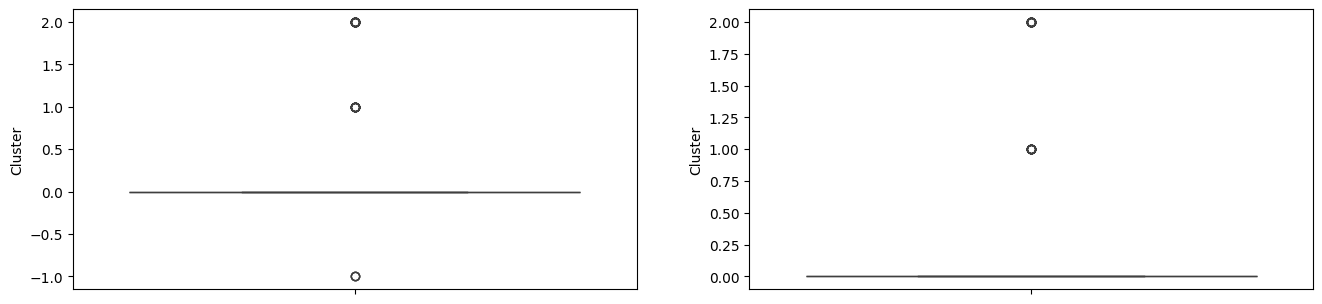

In [ ]:
# Comparison
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(df['Cluster']) # Old Data with Outliers
plt.subplot(2,2,2)
sns.boxplot(df_trimmed['Cluster']) # Trimmed data
plt.show()

In [ ]:
df['Cluster'].value_counts()

Cluster
 0    5546
 2      24
 1      13
-1       3
Name: count, dtype: int64

In [ ]:
df_trimmed['Cluster'].value_counts()

Cluster
0    5546
2      24
1      13
Name: count, dtype: int64

In [ ]:
df = df_trimmed.copy()

In [ ]:
df['Cluster'].value_counts()

Cluster
0    5546
2      24
1      13
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['Cluster'], axis=1)
y = df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4466, 13)
X_test shape: (1117, 13)
y_train shape: (4466,)
y_test shape: (1117,)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize KNN classifier
knn = KNeighborsClassifier()


# Fit the classifier on the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Get unique labels from the 'Outcome' column
labels = y.unique()

# Dictionary to store evaluation metrics
scores = {label: {'specificity': None, 'sensitivity': None, 'precision': None, 'recall': None, 'f1_score': None, 'accuracy': None} for label in labels}

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Extract evaluation metrics for each label
for idx, label in enumerate(labels):
    tp = cm[idx, idx]  # True Positive
    fn = cm[idx, :].sum() - tp  # False Negative
    fp = cm[:, idx].sum() - tp  # False Positive
    tn = cm.sum() - (tp + fn + fp)  # True Negative

    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = report[str(label)]['precision']
    recall = report[str(label)]['recall']
    f1_score = report[str(label)]['f1-score']
    accuracy = report['accuracy']

    scores[label]['specificity'] = specificity
    scores[label]['sensitivity'] = sensitivity
    scores[label]['precision'] = precision
    scores[label]['recall'] = recall
    scores[label]['f1_score'] = f1_score
    scores[label]['accuracy'] = accuracy

# Print evaluation metrics for each label
for label in labels:
    print(f"\nLabel '{label}' Scores:")
    print("Specificity:", scores[label]['specificity'])
    print("Sensitivity:", scores[label]['sensitivity'])
    print("Precision:", scores[label]['precision'])
    print("Recall:", scores[label]['recall'])
    print("F1 Score:", scores[label]['f1_score'])
    print("Accuracy:", scores[label]['accuracy'])

# Summarize results
print("\nOverall accuracy:", report['accuracy'])


Label '0' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '1' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '2' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Overall accuracy: 1.0


In [ ]:
# Initialize KNN classifier
knn = KNeighborsClassifier()

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Get unique labels from the 'Outcome' column
labels = y.unique()

# Dictionary to store evaluation metrics
avg_scores = {label: {'specificity': [], 'sensitivity': [], 'precision': [], 'recall': [], 'f1_score': [], 'accuracy': []} for label in labels}

# Perform KFold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    knn.fit(X_train, y_train)

    # Predict on the test data
    y_pred = knn.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Extract evaluation metrics for each label
    for idx, label in enumerate(labels):
        tp = cm[idx, idx]  # True Positive
        fn = cm[idx, :].sum() - tp  # False Negative
        fp = cm[:, idx].sum() - tp  # False Positive
        tn = cm.sum() - (tp + fn + fp)  # True Negative

        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        precision = report[str(label)]['precision']
        recall = report[str(label)]['recall']
        f1_score = report[str(label)]['f1-score']
        accuracy = report['accuracy']

        avg_scores[label]['specificity'].append(specificity)
        avg_scores[label]['sensitivity'].append(sensitivity)
        avg_scores[label]['precision'].append(precision)
        avg_scores[label]['recall'].append(recall)
        avg_scores[label]['f1_score'].append(f1_score)
        avg_scores[label]['accuracy'].append(accuracy)

    # Print evaluation metrics for each label after each iteration
    print(f"\nFold {i+1}:")
    for label in labels:
        print(f"\nLabel '{label}' Scores:")
        print("Specificity:", avg_scores[label]['specificity'][-1])
        print("Sensitivity:", avg_scores[label]['sensitivity'][-1])
        print("Precision:", avg_scores[label]['precision'][-1])
        print("Recall:", avg_scores[label]['recall'][-1])
        print("F1 Score:", avg_scores[label]['f1_score'][-1])
        print("Accuracy:", avg_scores[label]['accuracy'][-1])

# Summarize results across all folds
print("\nAverage scores across all folds:")
for label in labels:
    print(f"\nLabel '{label}' Average Scores:")
    print("Specificity:", sum(avg_scores[label]['specificity']) / len(avg_scores[label]['specificity']))
    print("Sensitivity:", sum(avg_scores[label]['sensitivity']) / len(avg_scores[label]['sensitivity']))
    print("Precision:", sum(avg_scores[label]['precision']) / len(avg_scores[label]['precision']))
    print("Recall:", sum(avg_scores[label]['recall']) / len(avg_scores[label]['recall']))
    print("F1 Score:", sum(avg_scores[label]['f1_score']) / len(avg_scores[label]['f1_score']))
    print("Accuracy:", sum(avg_scores[label]['accuracy']) / len(avg_scores[label]['accuracy']))



Fold 1:

Label '0' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '1' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '2' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Fold 2:

Label '0' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '1' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '2' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Fold 3:

Label '0' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '1' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '2' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0



#DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier
dt = DecisionTreeClassifier()

# Fit the classifier on the training data
dt.fit(X_train, y_train)

# Predict on the test data
y_pred = dt.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Get unique labels from the 'Outcome' column
labels = y.unique()

# Dictionary to store evaluation metrics
avg_scores = {label: {'specificity': None, 'sensitivity': None, 'precision': None, 'recall': None, 'f1_score': None, 'accuracy': None} for label in labels}

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Extract evaluation metrics for each label
for idx, label in enumerate(labels):
    print(f"\nLabel '{label}' Scores:")
    tp = cm[idx, idx]  # True Positive
    fn = cm[idx, :].sum() - tp  # False Negative
    fp = cm[:, idx].sum() - tp  # False Positive
    tn = cm.sum() - (tp + fn + fp)  # True Negative

    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = report[str(label)]['precision']
    recall = report[str(label)]['recall']
    f1_score = report[str(label)]['f1-score']
    accuracy = report['accuracy']

    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print("Accuracy:", accuracy)

# Summarize results
print("\nOverall accuracy:", report['accuracy'])


Label '0' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '1' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '2' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Overall accuracy: 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier
dt = DecisionTreeClassifier()

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Get unique labels from the 'Outcome' column
labels = y.unique()

# Dictionary to store evaluation metrics
avg_scores = {label: {'specificity': [], 'sensitivity': [], 'precision': [], 'recall': [], 'f1_score': [], 'accuracy': []} for label in labels}

# Perform KFold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    dt.fit(X_train, y_train)

    # Predict on the test data
    y_pred = dt.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Extract evaluation metrics for each label
    for idx, label in enumerate(labels):
        tp = cm[idx, idx]  # True Positive
        fn = cm[idx, :].sum() - tp  # False Negative
        fp = cm[:, idx].sum() - tp  # False Positive
        tn = cm.sum() - (tp + fn + fp)  # True Negative

        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        precision = report[str(label)]['precision']
        recall = report[str(label)]['recall']
        f1_score = report[str(label)]['f1-score']
        accuracy = report['accuracy']

        avg_scores[label]['specificity'].append(specificity)
        avg_scores[label]['sensitivity'].append(sensitivity)
        avg_scores[label]['precision'].append(precision)
        avg_scores[label]['recall'].append(recall)
        avg_scores[label]['f1_score'].append(f1_score)
        avg_scores[label]['accuracy'].append(accuracy)

    # Print evaluation metrics for each label after each iteration
    print(f"Fold {i+1}:")
    for label in labels:
        print(f"\nLabel '{label}' Scores:")
        print("Specificity:", avg_scores[label]['specificity'][-1])
        print("Sensitivity:", avg_scores[label]['sensitivity'][-1])
        print("Precision:", avg_scores[label]['precision'][-1])
        print("Recall:", avg_scores[label]['recall'][-1])
        print("F1 Score:", avg_scores[label]['f1_score'][-1])
        print("Accuracy:", avg_scores[label]['accuracy'][-1])

# Summarize results across all folds
print("\nAverage scores across all folds:")
for label in labels:
    print(f"\nLabel '{label}' Average Scores:")
    print("Specificity:", sum(avg_scores[label]['specificity']) / len(avg_scores[label]['specificity']))
    print("Sensitivity:", sum(avg_scores[label]['sensitivity']) / len(avg_scores[label]['sensitivity']))
    print("Precision:", sum(avg_scores[label]['precision']) / len(avg_scores[label]['precision']))
    print("Recall:", sum(avg_scores[label]['recall']) / len(avg_scores[label]['recall']))
    print("F1 Score:", sum(avg_scores[label]['f1_score']) / len(avg_scores[label]['f1_score']))
    print("Accuracy:", sum(avg_scores[label]['accuracy']) / len(avg_scores[label]['accuracy']))


Fold 1:

Label '0' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '1' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '2' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0
Fold 2:

Label '0' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '1' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '2' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0
Fold 3:

Label '0' Scores:
Specificity: 0.8888888888888888
Sensitivity: 1.0
Precision: 0.9990982867448152
Recall: 1.0
F1 Score: 0.9995489400090213
Accuracy: 0.999104744852283

Label '1' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 0.999104744852283

Label '2' Scores:
Specificity: 1.0
Sen

#NN

In [ ]:
from sklearn.neural_network import MLPClassifier
# Initialize Neural Network classifier
nn = MLPClassifier(random_state=42)

# Fit the classifier on the training data
nn.fit(X_train, y_train)

# Predict on the test data
y_pred = nn.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Get unique labels from the 'Outcome' column
labels = y.unique()

# Dictionary to store evaluation metrics
scores = {label: {'specificity': 0, 'sensitivity': 0, 'precision': 0, 'recall': 0, 'f1_score': 0, 'accuracy': 0} for label in labels}

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Extract evaluation metrics for each label
for idx, label in enumerate(labels):
    tp = cm[idx, idx]  # True Positive
    fn = cm[idx, :].sum() - tp  # False Negative
    fp = cm[:, idx].sum() - tp  # False Positive
    tn = cm.sum() - (tp + fn + fp)  # True Negative

    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = report[str(label)]['precision']
    recall = report[str(label)]['recall']
    f1_score = report[str(label)]['f1-score']
    accuracy = report['accuracy']

    scores[label]['specificity'] = specificity
    scores[label]['sensitivity'] = sensitivity
    scores[label]['precision'] = precision
    scores[label]['recall'] = recall
    scores[label]['f1_score'] = f1_score
    scores[label]['accuracy'] = accuracy

# Print evaluation metrics for each label
for label in labels:
    print(f"\nLabel '{label}' Scores:")
    print("Specificity:", scores[label]['specificity'])
    print("Sensitivity:", scores[label]['sensitivity'])
    print("Precision:", scores[label]['precision'])
    print("Recall:", scores[label]['recall'])
    print("F1 Score:", scores[label]['f1_score'])
    print("Accuracy:", scores[label]['accuracy'])

# Summarize results
print("\nOverall accuracy:", report['accuracy'])



Label '0' Scores:
Specificity: 0.36363636363636365
Sensitivity: 1.0
Precision: 0.9937050359712231
Recall: 1.0
F1 Score: 0.9968425800631484
Accuracy: 0.9937275985663082

Label '1' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 0.9937275985663082

Label '2' Scores:
Specificity: 1.0
Sensitivity: 0.125
Precision: 1.0
Recall: 0.125
F1 Score: 0.2222222222222222
Accuracy: 0.9937275985663082

Overall accuracy: 0.9937275985663082


In [ ]:
# Initialize Neural Network classifier
nn = MLPClassifier(random_state=42, max_iter=1000)

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Get unique labels from the 'Outcome' column
labels = y.unique()

# Dictionary to store evaluation metrics
avg_scores = {label: {'specificity': [], 'sensitivity': [], 'precision': [], 'recall': [], 'f1_score': [], 'accuracy': []} for label in labels}

# Perform KFold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    nn.fit(X_train, y_train)

    # Predict on the test data
    y_pred = nn.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Extract evaluation metrics for each label
    for idx, label in enumerate(labels):
        tp = cm[idx, idx]  # True Positive
        fn = cm[idx, :].sum() - tp  # False Negative
        fp = cm[:, idx].sum() - tp  # False Positive
        tn = cm.sum() - (tp + fn + fp)  # True Negative

        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        precision = report[str(label)]['precision']
        recall = report[str(label)]['recall']
        f1_score = report[str(label)]['f1-score']
        accuracy = report['accuracy']

        avg_scores[label]['specificity'].append(specificity)
        avg_scores[label]['sensitivity'].append(sensitivity)
        avg_scores[label]['precision'].append(precision)
        avg_scores[label]['recall'].append(recall)
        avg_scores[label]['f1_score'].append(f1_score)
        avg_scores[label]['accuracy'].append(accuracy)

    # Print evaluation metrics for each label after each iteration
    print(f"Fold {i+1}:")
    for label in labels:
        print(f"\nLabel '{label}' Scores:")
        print("Specificity:", avg_scores[label]['specificity'][-1])
        print("Sensitivity:", avg_scores[label]['sensitivity'][-1])
        print("Precision:", avg_scores[label]['precision'][-1])
        print("Recall:", avg_scores[label]['recall'][-1])
        print("F1 Score:", avg_scores[label]['f1_score'][-1])
        print("Accuracy:", avg_scores[label]['accuracy'][-1])

# Summarize results across all folds
print("\nAverage scores across all folds:")
for label in labels:
    print(f"\nLabel '{label}' Average Scores:")
    print("Specificity:", sum(avg_scores[label]['specificity']) / len(avg_scores[label]['specificity']))
    print("Sensitivity:", sum(avg_scores[label]['sensitivity']) / len(avg_scores[label]['sensitivity']))
    print("Precision:", sum(avg_scores[label]['precision']) / len(avg_scores[label]['precision']))
    print("Recall:", sum(avg_scores[label]['recall']) / len(avg_scores[label]['recall']))
    print("F1 Score:", sum(avg_scores[label]['f1_score']) / len(avg_scores[label]['f1_score']))
    print("Accuracy:", sum(avg_scores[label]['accuracy']) / len(avg_scores[label]['accuracy']))

Fold 1:

Label '0' Scores:
Specificity: 0.16666666666666666
Sensitivity: 1.0
Precision: 0.9955197132616488
Recall: 1.0
F1 Score: 0.9977548271216884
Accuracy: 0.9955237242614146

Label '1' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 0.9955237242614146

Label '2' Scores:
Specificity: 1.0
Sensitivity: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: 0.9955237242614146
Fold 2:

Label '0' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '1' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '2' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0
Fold 3:

Label '0' Scores:
Specificity: 1.0
Sensitivity: 0.9954873646209387
Precision: 1.0
Recall: 0.9954873646209387
F1 Score: 0.9977385798281322
Accuracy: 0.9955237242614146

Label '1' Scores:
Specificity: 0.9973045822102425
Sensitivity: 1.0
P

#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Initialize Naive Bayes classifier (GaussianNB for continuous features)
nb = GaussianNB()

# Fit the classifier on the entire training data
nb.fit(X_train, y_train)

# Predict on the test data
y_pred = nb.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=nb.classes_)

# Dictionary to store evaluation metrics
avg_scores = {label: {'specificity': 0, 'sensitivity': 0, 'precision': 0, 'recall': 0, 'f1_score': 0, 'accuracy': 0} for label in labels}

# Extract evaluation metrics for each label
for idx, label in enumerate(nb.classes_):
    print(f"\nLabel '{label}' Scores:")
    tp = cm[idx, idx]  # True Positive
    fn = cm[idx, :].sum() - tp  # False Negative
    fp = cm[:, idx].sum() - tp  # False Positive
    tn = cm.sum() - (tp + fn + fp)  # True Negative

    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = report[str(label)]['precision']
    recall = report[str(label)]['recall']
    f1_score = report[str(label)]['f1-score']
    accuracy = report['accuracy']

    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print("Accuracy:", accuracy)

# Summarize results
print("\nOverall accuracy:", report['accuracy'])


Label '0' Scores:
Specificity: 1.0
Sensitivity: 0.9972850678733032
Precision: 1.0
Recall: 0.9972850678733032
F1 Score: 0.9986406887177164
Accuracy: 0.9973118279569892

Label '1' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 0.9973118279569892

Label '2' Scores:
Specificity: 0.9972924187725631
Sensitivity: 1.0
Precision: 0.7272727272727273
Recall: 1.0
F1 Score: 0.8421052631578948
Accuracy: 0.9973118279569892

Overall accuracy: 0.9973118279569892


In [ ]:
# Initialize Naive Bayes classifier
nb = GaussianNB()

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Get unique labels from the 'Outcome' column
labels = y.unique()

# Dictionary to store evaluation metrics
avg_scores = {label: {'specificity': [], 'sensitivity': [], 'precision': [], 'recall': [], 'f1_score': [], 'accuracy': []} for label in labels}

# Perform KFold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    nb.fit(X_train, y_train)

    # Predict on the test data
    y_pred = nb.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Extract evaluation metrics for each label
    for idx, label in enumerate(labels):
        tp = cm[idx, idx]  # True Positive
        fn = cm[idx, :].sum() - tp  # False Negative
        fp = cm[:, idx].sum() - tp  # False Positive
        tn = cm.sum() - (tp + fn + fp)  # True Negative

        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        precision = report[str(label)]['precision']
        recall = report[str(label)]['recall']
        f1_score = report[str(label)]['f1-score']
        accuracy = report['accuracy']

        avg_scores[label]['specificity'].append(specificity)
        avg_scores[label]['sensitivity'].append(sensitivity)
        avg_scores[label]['precision'].append(precision)
        avg_scores[label]['recall'].append(recall)
        avg_scores[label]['f1_score'].append(f1_score)
        avg_scores[label]['accuracy'].append(accuracy)

    # Print evaluation metrics for each label after each iteration
    print(f"Fold {i+1}:")
    for label in labels:
        print(f"\nLabel '{label}' Scores:")
        print("Specificity:", avg_scores[label]['specificity'][-1])
        print("Sensitivity:", avg_scores[label]['sensitivity'][-1])
        print("Precision:", avg_scores[label]['precision'][-1])
        print("Recall:", avg_scores[label]['recall'][-1])
        print("F1 Score:", avg_scores[label]['f1_score'][-1])
        print("Accuracy:", avg_scores[label]['accuracy'][-1])

# Summarize results across all folds
print("\nAverage scores across all folds:")
for label in labels:
    print(f"\nLabel '{label}' Average Scores:")
    print("Specificity:", sum(avg_scores[label]['specificity']) / len(avg_scores[label]['specificity']))
    print("Sensitivity:", sum(avg_scores[label]['sensitivity']) / len(avg_scores[label]['sensitivity']))
    print("Precision:", sum(avg_scores[label]['precision']) / len(avg_scores[label]['precision']))
    print("Recall:", sum(avg_scores[label]['recall']) / len(avg_scores[label]['recall']))
    print("F1 Score:", sum(avg_scores[label]['f1_score']) / len(avg_scores[label]['f1_score']))
    print("Accuracy:", sum(avg_scores[label]['accuracy']) / len(avg_scores[label]['accuracy']))


Fold 1:

Label '0' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '1' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '2' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0
Fold 2:

Label '0' Scores:
Specificity: 1.0
Sensitivity: 0.9990990990990991
Precision: 1.0
Recall: 0.9990990990990991
F1 Score: 0.9995493465525012
Accuracy: 0.999104744852283

Label '1' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 0.999104744852283

Label '2' Scores:
Specificity: 0.9991023339317774
Sensitivity: 1.0
Precision: 0.75
Recall: 1.0
F1 Score: 0.8571428571428571
Accuracy: 0.999104744852283
Fold 3:

Label '0' Scores:
Specificity: 1.0
Sensitivity: 0.9981949458483754
Precision: 1.0
Recall: 0.9981949458483754
F1 Score: 0.999096657633243
Accuracy: 0.9982094897045658

Label '1' Scores:
Specificity: 1.0
Sensiti

#SVM Linear

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Initialize SVM linear classifier
svm = SVC(kernel='linear')


# Fit the classifier on the training data
svm.fit(X_train, y_train)

# Predict on the test data
y_pred = svm.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Generate confusion matrix
labels = y.unique()
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Print evaluation metrics
# Iterate over indices and labels simultaneously
for idx, label in enumerate(labels):
    print(f"\nLabel '{label}' Scores:")
    tp = cm[idx, idx]  # True Positive
    fn = cm[idx, :].sum() - tp  # False Negative
    fp = cm[:, idx].sum() - tp  # False Positive
    tn = cm.sum() - (tp + fn + fp)  # True Negative

    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = report[str(label)]['precision']
    recall = report[str(label)]['recall']
    f1_score = report[str(label)]['f1-score']
    accuracy = report['accuracy']

    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print("Accuracy:", accuracy)
# Summarize results
print("\nOverall accuracy:", report['accuracy'])


Label '0' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '1' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '2' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Overall accuracy: 1.0


In [ ]:
# Initialize SVM classifier with a linear kernel
svm = SVC(kernel='linear')

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Get unique labels from the 'Outcome' column
labels = y.unique()

# Dictionary to store evaluation metrics
avg_scores = {label: {'specificity': [], 'sensitivity': [], 'precision': [], 'recall': [], 'f1_score': [], 'accuracy': []} for label in labels}

# Perform KFold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    svm.fit(X_train, y_train)

    # Predict on the test data
    y_pred = svm.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Extract evaluation metrics for each label
    for idx, label in enumerate(labels):
        tp = cm[idx, idx]  # True Positive
        fn = cm[idx, :].sum() - tp  # False Negative
        fp = cm[:, idx].sum() - tp  # False Positive
        tn = cm.sum() - (tp + fn + fp)  # True Negative

        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        precision = report[str(label)]['precision']
        recall = report[str(label)]['recall']
        f1_score = report[str(label)]['f1-score']
        accuracy = report['accuracy']

        avg_scores[label]['specificity'].append(specificity)
        avg_scores[label]['sensitivity'].append(sensitivity)
        avg_scores[label]['precision'].append(precision)
        avg_scores[label]['recall'].append(recall)
        avg_scores[label]['f1_score'].append(f1_score)
        avg_scores[label]['accuracy'].append(accuracy)

    # Print evaluation metrics for each label after each iteration
    print(f"Fold {i+1}:")
    for label in labels:
        print(f"\nLabel '{label}' Scores:")
        print("Specificity:", avg_scores[label]['specificity'][-1])
        print("Sensitivity:", avg_scores[label]['sensitivity'][-1])
        print("Precision:", avg_scores[label]['precision'][-1])
        print("Recall:", avg_scores[label]['recall'][-1])
        print("F1 Score:", avg_scores[label]['f1_score'][-1])
        print("Accuracy:", avg_scores[label]['accuracy'][-1])

# Summarize results across all folds
print("\nAverage scores across all folds:")
for label in labels:
    print(f"\nLabel '{label}' Average Scores:")
    print("Specificity:", sum(avg_scores[label]['specificity']) / len(avg_scores[label]['specificity']))
    print("Sensitivity:", sum(avg_scores[label]['sensitivity']) / len(avg_scores[label]['sensitivity']))
    print("Precision:", sum(avg_scores[label]['precision']) / len(avg_scores[label]['precision']))
    print("Recall:", sum(avg_scores[label]['recall']) / len(avg_scores[label]['recall']))
    print("F1 Score:", sum(avg_scores[label]['f1_score']) / len(avg_scores[label]['f1_score']))
    print("Accuracy:", sum(avg_scores[label]['accuracy']) / len(avg_scores[label]['accuracy']))


Fold 1:

Label '0' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '1' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '2' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0
Fold 2:

Label '0' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '1' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '2' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0
Fold 3:

Label '0' Scores:
Specificity: 0.8888888888888888
Sensitivity: 1.0
Precision: 0.9990982867448152
Recall: 1.0
F1 Score: 0.9995489400090213
Accuracy: 0.999104744852283

Label '1' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 0.999104744852283

Label '2' Scores:
Specificity: 1.0
Sen

#SVM Non-Linear

In [ ]:
# Initialize SVM classifier with a non-linear kernel (e.g., 'rbf')
svm = SVC(kernel='rbf')

# Fit the classifier on the entire dataset
svm.fit(X, y)

# Predict on the same dataset
y_pred = svm.predict(X)

# Generate classification report
report = classification_report(y, y_pred, output_dict=True)

# Get unique labels from the 'Outcome' column
labels = y.unique()

# Dictionary to store evaluation metrics
avg_scores = {label: {'specificity': 0, 'sensitivity': 0, 'precision': 0, 'recall': 0, 'f1_score': 0, 'accuracy': 0} for label in labels}

# Generate confusion matrix
cm = confusion_matrix(y, y_pred, labels=labels)

# Extract evaluation metrics for each label
for idx, label in enumerate(labels):
    tp = cm[idx, idx]  # True Positive
    fn = cm[idx, :].sum() - tp  # False Negative
    fp = cm[:, idx].sum() - tp  # False Positive
    tn = cm.sum() - (tp + fn + fp)  # True Negative

    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = report[str(label)]['precision']
    recall = report[str(label)]['recall']
    f1_score = report[str(label)]['f1-score']
    accuracy = report['accuracy']


# Print evaluation metrics for each label
print("Evaluation Metrics for SVM Non-Linear Classification:")
for label in labels:
    print(f"\nLabel '{label}' Scores:")
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print("Accuracy:", accuracy)

# Summarize results
print("\nOverall accuracy:", report['accuracy'])


Evaluation Metrics for SVM Non-Linear Classification:

Label '0' Scores:
Specificity: 1.0
Sensitivity: 0.9583333333333334
Precision: 1.0
Recall: 0.9583333333333334
F1 Score: 0.9787234042553191
Accuracy: 0.999820884828945

Label '1' Scores:
Specificity: 1.0
Sensitivity: 0.9583333333333334
Precision: 1.0
Recall: 0.9583333333333334
F1 Score: 0.9787234042553191
Accuracy: 0.999820884828945

Label '2' Scores:
Specificity: 1.0
Sensitivity: 0.9583333333333334
Precision: 1.0
Recall: 0.9583333333333334
F1 Score: 0.9787234042553191
Accuracy: 0.999820884828945

Overall accuracy: 0.999820884828945


In [ ]:
# Initialize SVM classifier with a non-linear kernel (RBF)
svm = SVC(kernel='rbf', probability=True)

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Get unique labels from the 'Outcome' column
labels = y.unique()

# Dictionary to store evaluation metrics
avg_scores = {label: {'specificity': [], 'sensitivity': [], 'precision': [], 'recall': [], 'f1_score': [], 'accuracy': []} for label in labels}

# Perform KFold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    svm.fit(X_train, y_train)

    # Predict on the test data
    y_pred = svm.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Extract evaluation metrics for each label
    for idx, label in enumerate(labels):
        tp = cm[idx, idx]  # True Positive
        fn = cm[idx, :].sum() - tp  # False Negative
        fp = cm[:, idx].sum() - tp  # False Positive
        tn = cm.sum() - (tp + fn + fp)  # True Negative

        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        precision = report[str(label)]['precision']
        recall = report[str(label)]['recall']
        f1_score = report[str(label)]['f1-score']
        accuracy = report['accuracy']

        avg_scores[label]['specificity'].append(specificity)
        avg_scores[label]['sensitivity'].append(sensitivity)
        avg_scores[label]['precision'].append(precision)
        avg_scores[label]['recall'].append(recall)
        avg_scores[label]['f1_score'].append(f1_score)
        avg_scores[label]['accuracy'].append(accuracy)

    # Print evaluation metrics for each label after each iteration
    print(f"Fold {i+1}:")
    for label in labels:
        print(f"\nLabel '{label}' Scores:")
        print("Specificity:", avg_scores[label]['specificity'][-1])
        print("Sensitivity:", avg_scores[label]['sensitivity'][-1])
        print("Precision:", avg_scores[label]['precision'][-1])
        print("Recall:", avg_scores[label]['recall'][-1])
        print("F1 Score:", avg_scores[label]['f1_score'][-1])
        print("Accuracy:", avg_scores[label]['accuracy'][-1])

# Summarize results across all folds
print("\nAverage scores across all folds:")
for label in labels:
    print(f"\nLabel '{label}' Average Scores:")
    print("Specificity:", sum(avg_scores[label]['specificity']) / len(avg_scores[label]['specificity']))
    print("Sensitivity:", sum(avg_scores[label]['sensitivity']) / len(avg_scores[label]['sensitivity']))
    print("Precision:", sum(avg_scores[label]['precision']) / len(avg_scores[label]['precision']))
    print("Recall:", sum(avg_scores[label]['recall']) / len(avg_scores[label]['recall']))
    print("F1 Score:", sum(avg_scores[label]['f1_score']) / len(avg_scores[label]['f1_score']))
    print("Accuracy:", sum(avg_scores[label]['accuracy']) / len(avg_scores[label]['accuracy']))


Fold 1:

Label '0' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '1' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '2' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0
Fold 2:

Label '0' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '1' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0

Label '2' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0
Fold 3:

Label '0' Scores:
Specificity: 0.8888888888888888
Sensitivity: 1.0
Precision: 0.9990982867448152
Recall: 1.0
F1 Score: 0.9995489400090213
Accuracy: 0.999104744852283

Label '1' Scores:
Specificity: 1.0
Sensitivity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 0.999104744852283

Label '2' Scores:
Specificity: 1.0
Sen